# SCC-ICMC-USP - 1o. semestre de 2023
# SCC5948/MAI5024 - Exercício 4

### Profa. Roseli A. F. Romero

### Monitor: Diogo Godoi

Nro do grupo:

Alunos:


1.   List item
2.   List item


---


## Objetivos da prática:
- Entender modelagem de dados;
- Entender o processo de avaliação;
- Trabalhar com procedimentos de amostragem;
- Trabalhar com várias medidas de avaliação.


---

**Escolha, entre as opções abaixo, apenas UM dataset para realizar os exercícios.**

**Se o dataset escolhido tiver mais de duas classes, transforme ele num problema binário. Isso pode ser feito escolhendo uma classe para representar a classe positiva e o restante a classe negativa.**

**Possíveis datasets:**


*   **Câncer de mama:** [sklearn.datasets.load_breast_cancer](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer)
*   **Dígitos:** [sklearn.datasets.load_digits](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits)
*   **Wine:** [sklearn.datasets.load_wine](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine)


---


Após a análise dos dados e um pré-processamento vem a etapa de modelagem dos experimentos. Essa etapa pode requerer voltar no pré-processamento caso perceba-se que algo precisa ser feito. A modelagem visa determinar as etapas da execução dos experimentos. No nosso cenário, experimento é a utilização de algoritmos de classificação, regressão ou agrupamento. Para tanto, é preciso definir, com ajuda da análise dos dados, o tipo do problema (classificação, regressão, ...), os atributos/features a serem utilizados e o processo de avaliação.

Essa prática foca mais no processo de avaliação.
Para a avaliação é preciso definir qual a função de custo/erro adequada, e qual o estimador para o desempenho.

Utilizaremos medidas de desempenho para classificação binária baseadas na matriz de confusão (TFP, TFN, TVP, TVN).

Nas aplicações reais, o cliente dita qual a medida de desempenho deve ser utilizada, e muitas vezes não é uma das clássicas. E como essa medida, em geral, tem um impacto grande no treinamento do algoritmo de classificação, muitas vezes o algoritmo precisa ser adaptado e isso não é uma tarefa fácil.

Após a definição do tipo do problema e da medida de avaliação, é preciso definir como será estimado o desempenho final.

Esse processo está ligado á escolha do algoritmo de classificação bem como a escolha de alguns hiperparâmetros. Uma abordagem muito comum na área é a utilização do 10-fold Cross-Validation. Esse procedimento pode ser utilizado para estimar o desempenho do classificador final, bem como, na escolha de alguns poucos hiperparâmetros.

---


### Questão 01.

- Caso a base escolhida tenha mais de 2 classes, transforme-a em um problema binário definindo uma classe como positiva e a outra como negativa. Você pode fazer isso uma vez e depois usar a nova base nas próximas questões.

- Outras operações como remoção de atributos podem ser feitas uma vez fora da função de pré-processamento.

- Implemente a função de pré-processamento para sua base aplicando as técnicas que achar necessário.


In [4]:
# Transforme sua base em binária, isso pode ser feito apenas uma vez antes dos outros experimentos.
# usando o Iris como exemplo, mas a resolução seria similar para as outras base
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib as plt

data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)
# A target value of 0 indicates that the breast tumor is malignant (cancerous).
# A target value of 1 indicates that the breast tumor is benign (non-cancerous).


In [ ]:
def preprocess(x_treino, x_teste, y_treino, y_teste):
  return x_treino_novo, x_teste_novo, y_treino_novo, y_teste_novo

### Questão 02.

Implemente a função que retorna a matriz de confusão, escolha duas métricas e crie 2 funções, sendo  uma função para cada métrica calculada a partir da matriz confusão.

In [6]:
def confusion_matrix(y_test, y_pred):
  unique_labels = np.unique(np.concatenate((y_test, y_pred)))
  num_labels = len(unique_labels)
  conf = np.zeros((num_labels, num_labels))
  for i in range(len(y_test)):
      conf[int(y_test[i]), int(y_pred[i])] += 1
  return conf

actual    = np.array([1, 0, 1, 1, 0, 0, 1, 0, 1, 1])
predicted = np.array([0, 1, 1, 1, 1, 0, 1, 1, 0, 1])

conf_mat = confusion_matrix(actual, predicted)
print(conf_mat)

[[1. 3.]
 [2. 4.]]


In [18]:
# mudar o nome e parâmetros de acordo com sua métrica
def accuracy(conf):
  VP, VN = conf[0,0], conf[1, 1]
  accuracy_result = (VP+VN)/np.sum(conf)
  return accuracy_result

def f1_score(conf):
  VP, VN, FP, FN = conf[0,0], conf[1, 1], conf[1,0], conf[0,1]
  recall = VP/(VP+FN)
  TVN = VN/(VN+FP)
  f1_result = np.round(2/((1/recall)+(1/TVN)),2)
  return f1_result

unique_values, value_counts = np.unique(y_test, return_counts=True)
print(value_counts)
# Accuracy is a good metric when dataset is balanced

acc = accuracy(conf_mat)
f1 = f1_score(conf_mat)

print('Accuracy: ', acc)
print('F1 Score: ', f1)

[43 71]
Accuracy:  0.5
F1 Score:  0.36


Uma boa prática é escolher modelos mais simples, dados dois modelos com desempenho similar a escolha do mais simples é indicada pois com isso há algumas garantias de melhor generalização. Generalização, de maneira geral, é a propriedade que garante que o classificador terá desempenho parecido ao reportado no conjunto de teste.

A definição da complexidade de um modelo nem sempre é uma tarefa fácil. Uma maneira de tentar mensurar isso é através do número de parâmetros do modelo, do tipo de função que ele implementa (linear ou não linear, cortes ortogonais no espaço, ...).

### Questão 03.

Complete e execute a função *classificacao* definida no notebook.

- Aplique validação cruzada
- Use sua função de pré-processamento
- Use suas métricas de avaliação
- Diga qual o modelo tem o melhor desempenho e explique porque você acha isso.

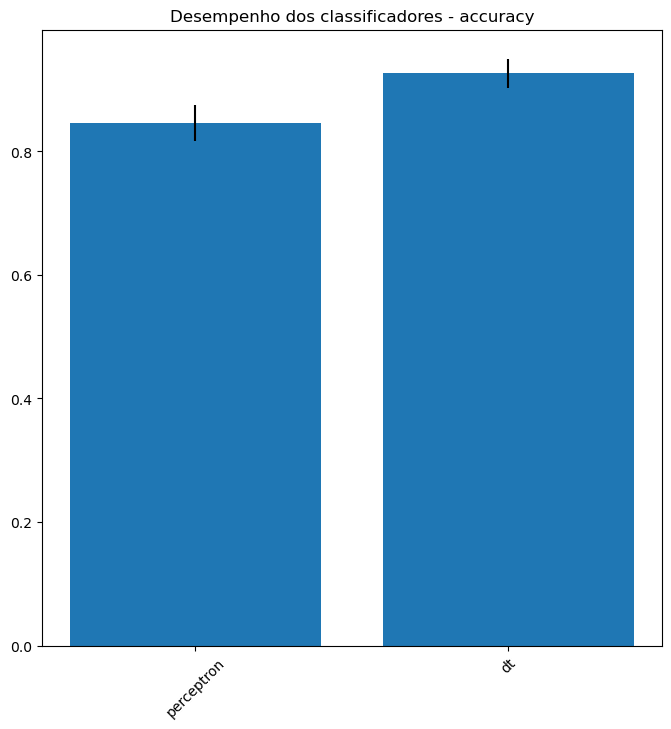

{'results': {'perceptron': [0.8333333333333334,
   0.8245614035087719,
   0.8333333333333334,
   0.9035087719298246,
   0.831858407079646],
  'dt': [0.9122807017543859,
   0.9649122807017544,
   0.8947368421052632,
   0.9298245614035088,
   0.9292035398230089]},
 'clfs': [Perceptron(), DecisionTreeClassifier(min_samples_split=56)]}

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.model_selection import KFold
from matplotlib import pyplot as plt
from numpy import mean, std
import numpy as np


def classificacao(data, columns, target, preproc_fn, score_fn, score_name,
                  folds=5, plot=True):
    """
    Executa classificação do conjunto de dados passado
    ---------------------------------------------------------------
    data:       DataFrame. Conjunto de dados
    columns:    Lista de inteiros. Índice das colunas utilizadas no treinamento e teste
    target:     Inteiro. Índice da coluna alvo
    preproc_fn: Função. Faz o pré-processamento da base já separada em treino e teste 
    score_fn:   Função. A função que calcula a medida de desempenho desejada. Deve ser uma 
                função que compara dois vetores, o primeiro vetor são os valores preditos
                pelo classificador, o segundo os rótulos reais
                Vide exemplo das funções em 
                http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
                como por exemplo, sklearn.metrics.accuracy_score
                http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
    score_name: String. Uma string com o nome da medida de desempenho
    folds:      Inteiro. Número de folds na validação cruzada
    plot:       Booleano. True para plotar os gráficos False para não plotar
    ---------------------------------------------------------------
    Realiza a classificação em 2 modelos (perceptron, Árvore de decisão)
    Plot o gráfico de desempenho para cada classificador.
    Retorna um dicionário com os classificadores treinados, as medidas de desempenho e matriz de confusão
    """
    # inicializa os modelos com os parâmetros solicitados
    prcp = Perceptron()
    dt = DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_split=int(len(data.data)*0.1))
    
    clfs = [prcp, dt]
    clfs_names = ['perceptron', 'dt']
  
    # prepara validação cruzada
    # faz divisão do dataset em fold partes
    ####
    kfold = KFold(n_splits=folds, shuffle=True, random_state=42)
    ####
    
    # itera para cada classificador fazendo treino e teste
    results = {'perceptron':[], 'dt':[]}
    for c, c_name in zip(clfs, clfs_names):
        # para cada split 
        for train_index, test_index in kfold.split(data.data):
            # separa conjunto de treino e de teste
            ####
            # Seu codigo aqui
            x_train, x_test = data.data[train_index], data.data[test_index]
            y_train, y_test = data.target[train_index], data.target[test_index]            
            # preprocessamento
            ####
            # Seu codigo aqui
            ####

            # faz o treino do modelo
            clf = c.fit(X=x_train, y=y_train)
            
            # valores preditos pelo classificador
            y_pred = clf.predict(x_test)
            # rótulos verdadeiros convertidos para array
            y_test = np.array(y_test)
            
            # realiza predição no conjunto de teste e salva o resultado
            ####
            conf_mat = confusion_matrix(y_test, y_pred)
            resultado = score_fn(conf_mat)
            results[c_name].append(resultado)
    
    if not plot:
        return {'results': results, 'clfs':clfs}
    # faz o plot de desempenho dos classificadores
    plt.figure(figsize=(8,8))
    plt.bar(range(1, len(clfs)+1), [mean(results[name]) for name in clfs_names], 
                                yerr=[std(results[name]) for name in clfs_names])
    plt.xticks(range(1, len(clfs)+1), clfs_names, rotation=45)
    title = 'Desempenho dos classificadores - %s'%(score_name)
    plt.title(title)
    plt.show()
    
    return {'results': results, 'clfs':clfs}



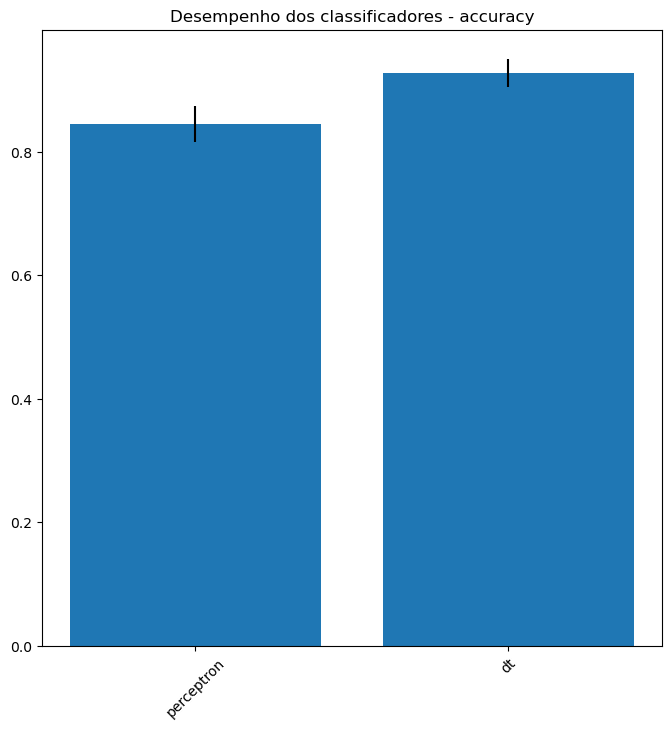

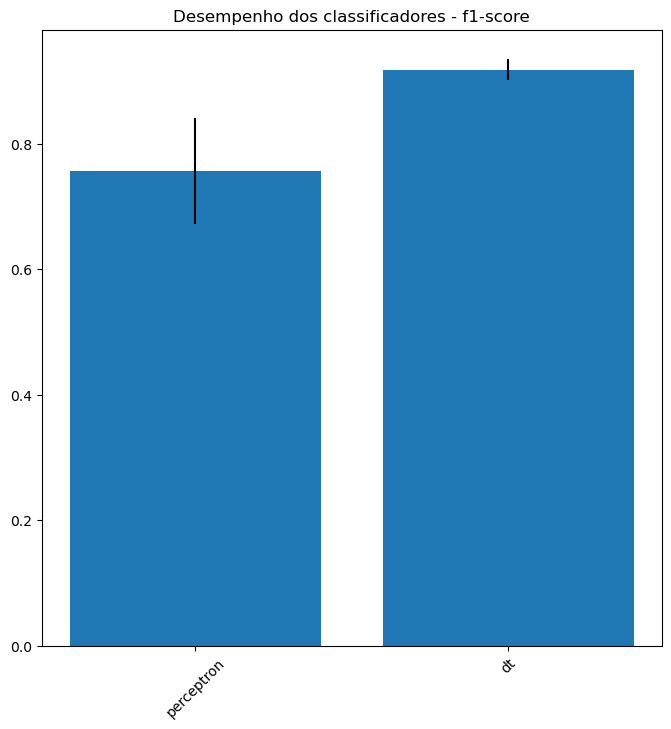

{'results': {'perceptron': [0.72, 0.63, 0.73, 0.86, 0.84],
  'dt': [0.91, 0.95, 0.9, 0.91, 0.92]},
 'clfs': [Perceptron(), DecisionTreeClassifier(min_samples_split=56)]}

In [29]:
# Chama a função com suas métricas
classificacao(data, 0, 0, 0, accuracy, 'accuracy', folds=5, plot=True)
classificacao(data, 0, 0, 0, f1_score, 'f1-score', folds=5, plot=True)


---

### Questão 03.

Utilizar os 2 procedimentos de amostragem para estimação do desempenho:
- 10-fold Cross Validation;
- Leave-one-out;

Para o dataset escolhido, executar os 3 procedimentos acima para estimar o desempenho. Avalie a diferença na variância entre essas abordagens.

  * Você pode utilizar a função *classificacao* já disponível apenas ajustando o parâmetro *folds*.

Essas execuções podem demorar um pouco, então tenham paciência.

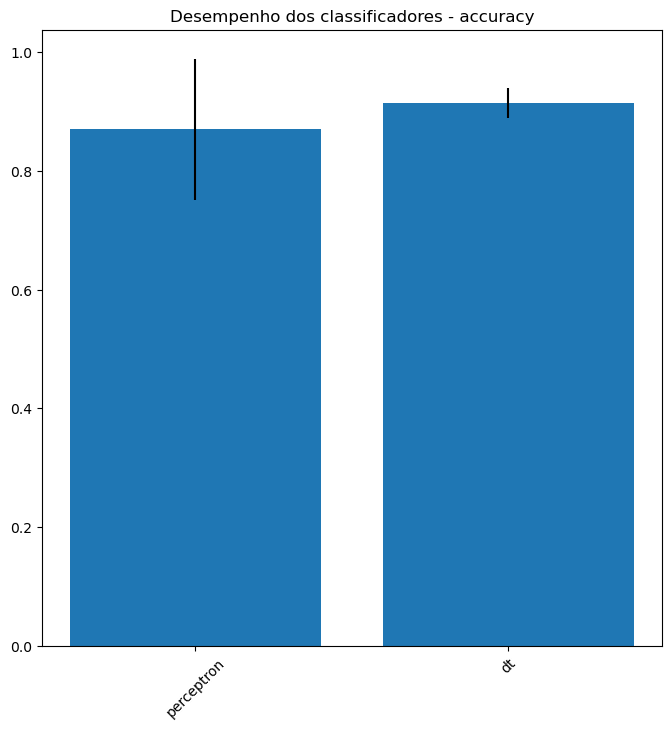

{'results': {'perceptron': [0.9473684210526315,
   0.543859649122807,
   0.9473684210526315,
   0.9473684210526315,
   0.8596491228070176,
   0.8771929824561403,
   0.9824561403508771,
   0.8245614035087719,
   0.9122807017543859,
   0.8571428571428571],
  'dt': [0.8947368421052632,
   0.9122807017543859,
   0.9473684210526315,
   0.8947368421052632,
   0.8771929824561403,
   0.8947368421052632,
   0.9298245614035088,
   0.9473684210526315,
   0.9473684210526315,
   0.8928571428571429]},
 'clfs': [Perceptron(), DecisionTreeClassifier(min_samples_split=56)]}

In [30]:
# Chama a função com 10-fold cross validation
classificacao(data, 0, 0, 0, accuracy, 'accuracy', folds=10, plot=True)


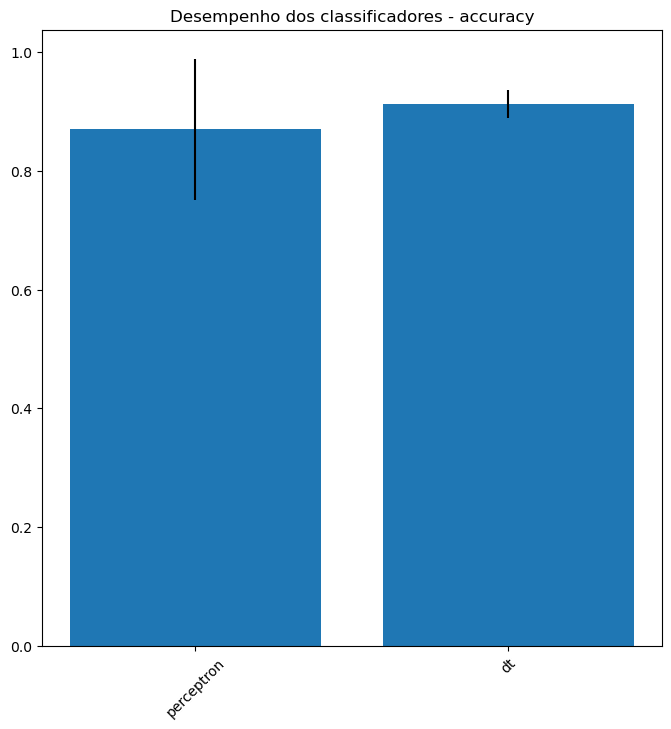

{'results': {'perceptron': [0.9473684210526315,
   0.543859649122807,
   0.9473684210526315,
   0.9473684210526315,
   0.8596491228070176,
   0.8771929824561403,
   0.9824561403508771,
   0.8245614035087719,
   0.9122807017543859,
   0.8571428571428571],
  'dt': [0.8947368421052632,
   0.9122807017543859,
   0.9298245614035088,
   0.8947368421052632,
   0.8771929824561403,
   0.8947368421052632,
   0.9298245614035088,
   0.9473684210526315,
   0.9473684210526315,
   0.8928571428571429]},
 'clfs': [Perceptron(), DecisionTreeClassifier(min_samples_split=56)]}

In [31]:
# Chama a função com leave-one-out
from sklearn.model_selection import LeaveOneOut

def classificacao_loo(data, columns, target, preproc_fn, score_fn, score_name, plot=True):
    """
    Executa classificação do conjunto de dados passado
    ---------------------------------------------------------------
    data:       DataFrame. Conjunto de dados
    columns:    Lista de inteiros. Índice das colunas utilizadas no treinamento e teste
    target:     Inteiro. Índice da coluna alvo
    preproc_fn: Função. Faz o pré-processamento da base já separada em treino e teste 
    score_fn:   Função. A função que calcula a medida de desempenho desejada. Deve ser uma 
                função que compara dois vetores, o primeiro vetor são os valores preditos
                pelo classificador, o segundo os rótulos reais
                Vide exemplo das funções em 
                http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
                como por exemplo, sklearn.metrics.accuracy_score
                http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
    score_name: String. Uma string com o nome da medida de desempenho
    folds:      Inteiro. Número de folds na validação cruzada
    plot:       Booleano. True para plotar os gráficos False para não plotar
    ---------------------------------------------------------------
    Realiza a classificação em 2 modelos (perceptron, Árvore de decisão)
    Plot o gráfico de desempenho para cada classificador.
    Retorna um dicionário com os classificadores treinados, as medidas de desempenho e matriz de confusão
    """
    # inicializa os modelos com os parâmetros solicitados
    prcp = Perceptron()
    dt = DecisionTreeClassifier(criterion='gini', splitter='best', min_samples_split=int(len(data.data)*0.1))
    
    clfs = [prcp, dt]
    clfs_names = ['perceptron', 'dt']
  
    # prepara validação cruzada
    # faz divisão do dataset em fold partes
    ####
    loo = LeaveOneOut()
    ####
    
    # itera para cada classificador fazendo treino e teste
    results = {'perceptron':[], 'dt':[]}
    for c, c_name in zip(clfs, clfs_names):
        # para cada split 
        for train_index, test_index in loo.split(data.data):
            # separa conjunto de treino e de teste
            ####
            # Seu codigo aqui
            x_train, x_test = data.data[train_index], data.data[test_index]
            y_train, y_test = data.target[train_index], data.target[test_index]            
            # preprocessamento
            ####
            # Seu codigo aqui
            ####

            # faz o treino do modelo
            clf = c.fit(X=x_train, y=y_train)
            
            # valores preditos pelo classificador
            y_pred = clf.predict(x_test)
            # rótulos verdadeiros convertidos para array
            y_test = np.array(y_test)
            
            # realiza predição no conjunto de teste e salva o resultado
            ####
            conf_mat = confusion_matrix(y_test, y_pred)
            resultado = score_fn(conf_mat)
            results[c_name].append(resultado)
    
    if not plot:
        return {'results': results, 'clfs':clfs}
    # faz o plot de desempenho dos classificadores
    plt.figure(figsize=(8,8))
    plt.bar(range(1, len(clfs)+1), [mean(results[name]) for name in clfs_names], 
                                yerr=[std(results[name]) for name in clfs_names])
    plt.xticks(range(1, len(clfs)+1), clfs_names, rotation=45)
    title = 'Desempenho dos classificadores - %s'%(score_name)
    plt.title(title)
    plt.show()
    
    return {'results': results, 'clfs':clfs}

classificacao(data, 0, 0, 0, accuracy, 'accuracy', folds=10, plot=True)
